In [1]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[16.843341630766982, 9.099446434807291, 42.212967341429035, 39.73499234711243, 5.836774708074675, 0.34584002935428515, 4.5189191448131005, 2.3174266041286202, 2.377594151251042, 3.1016389745098145, 4.630072950208421, -1.7259331783947545, 20.62849090243253, 7.675757019031725, 37.967629225222964, 0.0, -0.07416456949739114, 1.8733358715332429, 8.565367747059902, 1.8654687178106748, 2.957464765453082, 11.23023165693207, 15.870047565036856, 65.70120386808827, 47.80918737138896, 10.152554342133627, 53.63133594898769, 1.3575739461552843, 30.386913691182873, 14.664817656854305, 0.050456113595696905, 2.4348844593540946, 0.6623736359703258, 19.42056872084499, 13.155618262768073, 9.35222803233495]
Avg change: 14.073122946909326
Std: 17.042622031292943
95% CI: 5.5672565302223616


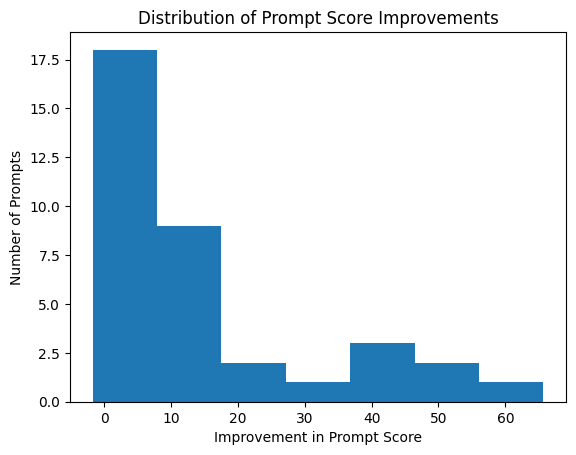

In [2]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

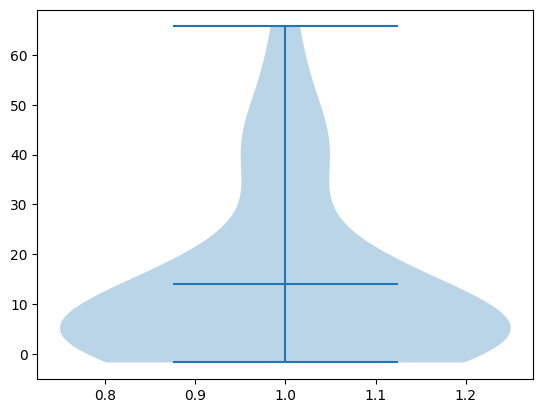

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()